In [1]:
import pandas as pd

In [11]:
# First lets do some quick data cleaning
df = pd.read_csv('/Users/noah/Data Analysis Portfolio Projects/NFL Data Project/season_scores/combined_2017-2024_scores.csv')
# Add the year to the Date Column
df['Season'] = df['Season'].astype(str)
df['Date'] = df['Date'] + '/' + df['Season']
df['Season'] = df['Season'].astype(int)
# Turn columns into correct datatype
df['Date'] = pd.to_datetime(df['Date'])




In [12]:
df.head()

,Season,Week,GameStatus,Day,Date,AwayTeam,AwayRecord,AwayScore,AwayWin,HomeTeam,HomeRecord,HomeScore,HomeWin,AwaySeeding,HomeSeeding,PostSeason
0,2017,Hall Of Fame,FINAL,THU,2017-08-03,Cardinals,0-1,18.0,0.0,Cowboys,1-0,20.0,1.0,NaN,NaN,0
1,2017,Preseason Week 1,FINAL,WED,2017-08-09,Texans,0-1,17.0,0.0,Panthers,1-0,27.0,1.0,NaN,NaN,0
2,2017,Preseason Week 1,FINAL,THU,2017-08-10,Vikings,1-0,17.0,1.0,Bills,0-1,10.0,0.0,NaN,NaN,0
3,2017,Preseason Week 1,FINAL,THU,2017-08-10,Falcons,0-1,20.0,0.0,Dolphins,1-0,23.0,1.0,NaN,NaN,0
4,2017,Preseason Week 1,FINAL,THU,2017-08-10,Redskins,0-1,3.0,0.0,Ravens,1-0,23.0,1.0,NaN,NaN,0


In [25]:
# we only want reg and post season data for this analysis
reg_post_df = df[~df['Week'].str.contains('Preseason|Hall Of Fame', na=False)]


Analyze Trends in Scoring Between Seasons

General Trends

1) Seasonal Scoring Trends
    - How have average scores (home, away, and total) changed over the years?
    - Are games generally higher-scoring in recent seasons compared to earlier ones?


In [26]:
season_avg_scores = reg_post_df.groupby('Season').agg(
    avg_home_scores = ('HomeScore', 'mean'),
    avg_away_scores = ('AwayScore', 'mean')
).reset_index()
season_avg_scores['avg_total_scores'] = season_avg_scores['avg_home_scores'] + season_avg_scores['avg_away_scores']
season_avg_scores['avg_home_scores'] = season_avg_scores['avg_home_scores'].round(2)
season_avg_scores['avg_away_scores'] = season_avg_scores['avg_away_scores'].round(2)
season_avg_scores['avg_total_scores'] = season_avg_scores['avg_total_scores'].round(2)
print(season_avg_scores)

   Season  avg_home_scores  avg_away_scores  avg_total_scores
0    2017            23.11            20.53             43.64
1    2018            24.28            22.22             46.50
2    2019            22.93            22.87             45.80
3    2020            24.83            24.66             49.49
4    2021            24.06            22.11             46.17
5    2022            23.06            20.97             44.03
6    2023            23.36            20.44             43.80
7    2024            23.57            21.46             45.03


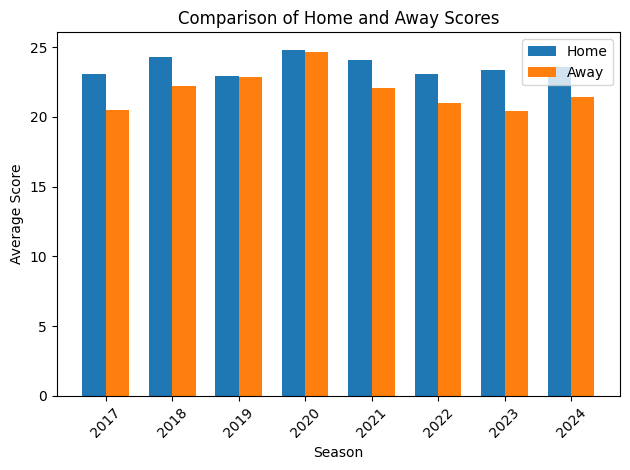

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Bar positions
x = np.arange(len(season_avg_scores['Season']))

# Bar widths
bar_width = 0.35

# Plot bars
plt.bar(x - bar_width/2, season_avg_scores['avg_home_scores'], width=bar_width, label='Home')
plt.bar(x + bar_width/2, season_avg_scores['avg_away_scores'], width=bar_width, label='Away')

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Average Score')
plt.title('Comparison of Home and Away Scores')
plt.xticks(x, season_avg_scores['Season'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

We can see that average scoring for both home and away teams have stayed pretty consistent throughout the years. I do want to point out that in the years 2022-2023, away teams had the lowest average scores. My hypothesis was that scoring had gone up across the league since 2017, especially with all the high powered offenses shown in the NFL now, but clearly we can see that there has not been much change.

2) Winning Scores
	- What is the average score for winning teams (home and away) each season?
	- Has the margin of victory changed over time?

In [33]:
home_wins = reg_post_df[reg_post_df['HomeWin']==1]
away_wins = reg_post_df[reg_post_df['AwayWin']==1]

avg_home_win = home_wins.groupby('Season')['HomeScore'].mean().round(2)
avg_away_win = away_wins.groupby('Season')['AwayScore'].mean().round(2)

avg_win_df = pd.DataFrame({
    'HomeWinningScore': avg_home_win,
    'AwayWinningScore': avg_away_win
}).reset_index()
avg_win_df


,Season,HomeWinningScore,AwayWinningScore
0,2017,28.39,26.69
1,2018,29.28,28.04
2,2019,28.51,28.91
3,2020,29.69,30.90
4,2021,30.54,27.66
5,2022,26.94,26.96
6,2023,28.06,26.89
7,2024,29.46,27.34
